# Forecasting Property Investment Hotspots

**Authored by: Aneesh Pedram**

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python</div>
</div>

## Scenario

The City of Melbourne faces challenges in identifying suburbs with high property investment potential due to fluctuating house prices and varying population growth rates. This makes it difficult for investors and policymakers to make informed decisions about resource allocation and urban development. 

To address this, I propose an analysis that combines historical house price trends and population forecasts to identify investment hotspots. The insights will assist in optimizing urban planning, guiding investment strategies, and fostering sustainable growth in the city.

### User Story
**As** a property investor or urban planner,  
**I want** to use an analysis that identifies suburbs with high property investment potential based on historical house price trends and population growth forecasts,  
**so that** I can make informed decisions about resource allocation, urban development, and investment strategies.

**What the use case will teach you**

At the end of this use case you will:
- Demonstrate the ability to retrieve and process data from public APIs.
- Apply data cleaning and preprocessing techniques on property and population datasets.
- Perform basic aggregation and filtering methods to analyse trends.
- Calculate growth metrics such as CAGR and population growth percentages.
- Implement data visualisation techniques to identify investment hotspots.

## Introduction

Understanding property investment trends is crucial for urban development, resource allocation, and guiding investors towards high-potential areas. The City of Melbourne collects extensive data on house prices and population forecasts, which, when analysed together, can reveal valuable insights into investment opportunities.

This project focuses on developing an analysis that combines these datasets to identify suburbs with high property investment potential. By leveraging historical trends and growth forecasts, stakeholders can make informed decisions to optimise urban planning, foster sustainable growth, and maximise returns on investment. This approach supports smarter, data-driven strategies for urban development and investment planning.

***Dataset Links***
- House Prices Dataset: [House Prices by Small Area Sale Year](https://data.melbourne.vic.gov.au/explore/dataset/house-prices-by-small-area-sale-year/api/)
- Population Forecast Dataset: [City of Melbourne Population Forecasts](https://data.melbourne.vic.gov.au/explore/dataset/city-of-melbourne-population-forecasts-by-small-area-2020-2040/api/)

In [1]:
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

# Function to collect data via the export endpoint
def collect_data(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    format = 'csv'
    url = f'{base_url}{dataset_id}/exports/{format}'

    params = {
        'select': '*',
        'limit': -1,   # fetch all records
        'lang': 'en',
        'timezone': 'UTC'
    }

    response = requests.get(url, params=params)

    if response.status_code == 200:
        csv_content = response.content.decode('utf-8')
        dataset = pd.read_csv(StringIO(csv_content), delimiter=';')
        return dataset
    else:
        raise Exception(f"Request failed with status code {response.status_code} for {dataset_id}")

# Fetch House Prices Dataset
house_prices_id = 'house-prices-by-small-area-sale-year'
prices = collect_data(house_prices_id)
print(f"House Prices Dataset contains {len(prices)} records.")
print(prices.head(3))

# Fetch Population Forecast Dataset
population_id = 'city-of-melbourne-population-forecasts-by-small-area-2020-2040'
pop = collect_data(population_id)
print(f"Population Forecast Dataset contains {len(pop)} records.")
print(pop.head(3))


House Prices Dataset contains 347 records.
   sale_year             small_area                   type  median_price  \
0       2000              Southbank  Residential Apartment      370500.0   
1       2001              Parkville        House/Townhouse      354000.0   
2       2002  Melbourne (Remainder)  Residential Apartment      367562.0   

   transaction_count  
0                901  
1                 36  
2                 44  
Population Forecast Dataset contains 10584 records.
    geography  year  gender        age  value
0  Kensington  2037    Male  Age 45-49    747
1  Kensington  2038  Female  Age 20-24    428
2  Kensington  2038  Female  Age 75-79    144


## Data Collection

This code block defines a function `collect_data` to fetch datasets from the City of Melbourne's open data API. The function:
- Constructs the API endpoint URL dynamically using the dataset ID.
- Sends a GET request to the API with parameters to fetch all records in CSV format.
- Decodes the response content and loads it into a Pandas DataFrame for further analysis.

The datasets fetched include:
1. House Prices Dataset: Provides historical house price trends by small area.
2. Population Forecast Dataset: Contains population forecasts for small areas from 2020 to 2040.

This step ensures that the data is retrieved programmatically, making the process reproducible and scalable.

In [2]:
# Capitalize column names for both datasets
prices.columns = ['_'.join([word.capitalize() for word in col.split('_')]) for col in prices.columns]
pop.columns = ['_'.join([word.capitalize() for word in col.split('_')]) for col in pop.columns]

## Column Capitalisation

This code block standardises column names for both datasets by:
- Splitting column names on underscores (`_`).
- Capitalising each word in the column name.
- Joining the words back with underscores.

This ensures consistency in column naming, making the datasets easier to work with and improving readability in subsequent analysis steps.

In [3]:
prices.head() 

,Sale_Year,Small_Area,Type,Median_Price,Transaction_Count
0,2000,Parkville,House/Townhouse,516000.0,42
1,2001,Carlton,House/Townhouse,381000.0,113
2,2001,Melbourne (CBD),House/Townhouse,NaN,4
3,2001,North Melbourne,Residential Apartment,270000.0,271
4,2001,South Yarra,House/Townhouse,800000.0,46


In [4]:
pop.head()

,Geography,Year,Gender,Age,Value
0,Carlton,2023,Female,Age 65-69,224
1,Carlton,2023,Female,Age 85+,66
2,Carlton,2024,Female,Age 25-29,2105
3,Carlton,2024,Female,Age 30-34,1174
4,Carlton,2024,Male,Age 25-29,1978


## Data Cleaning
- Check and clean column names.
- Handle missing values in `Small_Area` and `Median_Price`.
- Convert columns to appropriate data types.

In [5]:
# Check missing values in both datasets
print("Missing values in House Prices dataset:")
print(prices.isnull().sum())

print("Missing values in Population Forecast dataset:")
print(pop.isnull().sum())

Missing values in House Prices dataset:
Sale_Year             0
Small_Area            7
Type                  0
Median_Price         28
Transaction_Count     0
dtype: int64
Missing values in Population Forecast dataset:
Geography    0
Year         0
Gender       0
Age          0
Value        0
dtype: int64


## Handling Missing Values

This code block checks for missing values in both datasets:
- Uses the `isnull()` method to identify missing values in each column.
- Summarises the count of missing values per column using `sum()`.

This step helps identify data quality issues early, ensuring that appropriate cleaning steps can be applied to handle missing data effectively.

In [28]:
# Clean population dataset
pop.rename(columns={pop.columns[0]: 'Small_Area'}, inplace=True)

# Drop rows where Small_Area is missing
prices = prices.dropna(subset=['Small_Area'])

# Fill missing Median_Price with median price for that Small_Area
prices['Median_Price'] = prices.groupby('Small_Area')['Median_Price'].transform(lambda x: x.fillna(x.median()))

prices['Sale_Year'] = prices['Sale_Year'].astype(int)
prices.head(10)

,Sale_Year,Small_Area,Type,Median_Price,Transaction_Count
0,2000,Parkville,House/Townhouse,516000.0,42
1,2001,Carlton,House/Townhouse,381000.0,113
2,2001,Melbourne (CBD),House/Townhouse,364000.0,4
3,2001,North Melbourne,Residential Apartment,270000.0,271
4,2001,South Yarra,House/Townhouse,800000.0,46
5,2002,West Melbourne (Residential),Residential Apartment,335000.0,104
6,2003,Kensington,Residential Apartment,0.0,288
7,2003,West Melbourne (Residential),House/Townhouse,375000.0,72
8,2004,Docklands,Residential Apartment,445000.0,252
9,2005,Melbourne (CBD),Residential Apartment,317500.0,1119


## Data Cleaning and Transformation

This code block performs the following cleaning and transformation steps:
1. Renames the first column in the population dataset to `Small_Area` for consistency.
2. Drops rows in the house prices dataset where `Small_Area` is missing, as these rows cannot be analysed.
3. Fills missing values in the `Median_Price` column with the median price for the corresponding `Small_Area` to preserve data integrity.
4. Converts the `Sale_Year` column to an integer type for accurate numerical operations.

These steps ensure that the datasets are clean, consistent, and ready for analysis.

## Exploratory Data Analysis (EDA)

,Sale_Year,Median_Price,Transaction_Count
count,340.000000,3.400000e+02,340.000000
mean,2008.170588,6.419830e+05,282.352941
std,4.879705,8.584610e+05,483.899163
min,2000.000000,0.000000e+00,1.000000
25%,2004.000000,3.640000e+05,48.750000
50%,2008.000000,4.805000e+05,122.000000
75%,2012.000000,6.470000e+05,225.250000
max,2016.000000,1.430000e+07,3766.000000


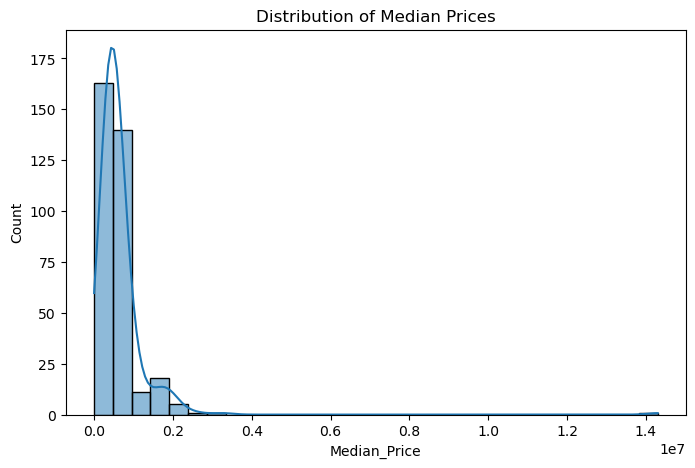

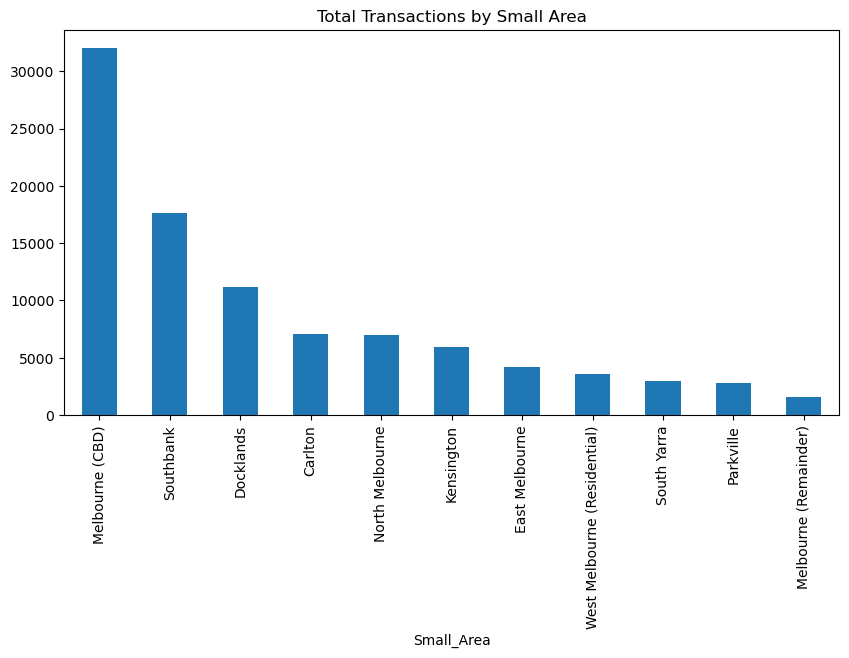

In [29]:
# Summary statistics
display(prices.describe())

# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(prices['Median_Price'], bins=30, kde=True)
plt.title('Distribution of Median Prices')
plt.show()

# Transactions per Small_Area
plt.figure(figsize=(10,5))
prices.groupby('Small_Area')['Transaction_Count'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Transactions by Small Area')
plt.show()

## Exploratory Data Analysis (EDA)

This code block performs EDA to understand the house prices dataset:
1. Displays summary statistics for numerical columns using `describe()` to identify key metrics like mean, median, and range.
2. Plots the distribution of `Median_Price` using a histogram with a kernel density estimate (KDE) to visualise price trends.
3. Creates a bar chart showing the total number of transactions per `Small_Area` to identify areas with high activity.

These visualisations and statistics provide insights into the data's structure and highlight potential patterns or anomalies.

## Insights from Exploratory Data Analysis (EDA)

The exploratory data analysis revealed the following key insights:

1. **Median Price Distribution**:
   - The histogram of median prices shows a right-skewed distribution, indicating that most properties are priced below the average, with a few high-value outliers.
   - This insight is crucial for understanding the overall affordability and identifying high-value areas.

2. **Transaction Activity by Small Area**:
   - The bar chart highlights areas with the highest transaction counts, which could indicate high demand or market activity.
   - These areas are potential hotspots for investment due to their active property markets.

These insights provide a foundational understanding of the dataset, helping to identify trends and anomalies that will guide further analysis.

## Population Growth Analysis

In [30]:
baseline_year, future_year = 2023, 2043
pop_agg = pop.groupby(['Small_Area', 'Year'])['Value'].sum().reset_index()
base_pop = pop_agg[pop_agg['Year'] == baseline_year].set_index('Small_Area')['Value']
fut_pop = pop_agg[pop_agg['Year'] == future_year].set_index('Small_Area')['Value']
pop_growth_pct = ((fut_pop - base_pop) / base_pop * 100).dropna()
pop_growth_pct.sort_values(ascending=False).head()

Small_Area
Port Melbourne                  27328.571429
North Melbourne                   102.485454
West Melbourne (Residential)       73.272422
Docklands                          69.612045
Southbank                          67.560029
Name: Value, dtype: float64

## Insights from Population Growth Analysis

The population growth analysis provided the following insights:

1. **Top Growth Areas**:
   - Suburbs with the highest population growth percentages were identified, indicating areas with increasing demand for housing and infrastructure.
   - These areas are likely to attract more investment due to their growing population base.

2. **Baseline vs Future Population**:
   - Comparing the baseline year (2023) with the future year (2043) highlights the magnitude of growth in specific suburbs.
   - This insight is relevant for urban planners and investors aiming to align their strategies with demographic trends.

These insights are critical for understanding how population dynamics influence property investment opportunities.

## Price CAGR (Compound Annual Growth Rate)

In [31]:
def calculate_cagr(df):
    records = []
    for area, grp in df.groupby('Small_Area'):
        grp = grp.sort_values('Sale_Year')
        if len(grp) >= 2:
            first = grp.iloc[0]
            last = grp.iloc[-1]
            years = last['Sale_Year'] - first['Sale_Year']
            if years > 0 and first['Median_Price'] > 0:
                cagr = (last['Median_Price'] / first['Median_Price']) ** (1 / years) - 1
                records.append({'Small_Area': area, 'price_cagr': cagr})
    return pd.DataFrame(records).set_index('Small_Area')

price_cagr_df = calculate_cagr(prices)
price_cagr_df.sort_values('price_cagr', ascending=False).head()

,price_cagr
Small_Area,
South Yarra,0.155976
North Melbourne,0.105703
East Melbourne,0.050614
Melbourne (Remainder),0.045805
Kensington,0.044198


## Insights from Price CAGR Analysis

The analysis of Compound Annual Growth Rate (CAGR) for property prices revealed:

1. **High-Growth Suburbs**:
   - Suburbs with the highest price CAGR were identified, indicating areas with consistent and significant price appreciation over time.
   - These areas are prime candidates for long-term investment due to their strong growth trends.

2. **Market Stability**:
   - The calculation of CAGR helps in understanding the stability and reliability of price growth in different suburbs.
   - This insight is valuable for risk-averse investors seeking predictable returns.

These insights highlight the importance of historical price trends in identifying lucrative investment opportunities.

## Investment Index and Hotspots

In [32]:
investment_df = price_cagr_df.join(pop_growth_pct, how='inner')
investment_df.rename(columns={'Value': 'pop_growth_pct'}, inplace=True)
investment_df['investment_index'] = investment_df['price_cagr'] * (investment_df['pop_growth_pct']/100)
top10 = investment_df.sort_values('investment_index', ascending=False).head(10)
top10

,price_cagr,pop_growth_pct,investment_index
Small_Area,,,
North Melbourne,0.105703,102.485454,0.108330
South Yarra,0.155976,40.145808,0.062618
West Melbourne (Residential),0.043509,73.272422,0.031880
Kensington,0.044198,63.406298,0.028024
East Melbourne,0.050614,38.361989,0.019417
Southbank,0.026724,67.560029,0.018055
Melbourne (Remainder),0.045805,35.611285,0.016312
Carlton,0.030065,41.742959,0.012550
Docklands,0.012132,69.612045,0.008445


## Insights from Investment Index and Hotspots

The investment index analysis provided the following insights:

1. **Top Investment Hotspots**:
   - The top 10 suburbs with the highest investment index were identified, combining both price CAGR and population growth percentages.
   - These hotspots represent areas with the best balance of price appreciation and demographic growth, making them ideal for investment.

2. **Balanced Growth**:
   - The investment index highlights suburbs that excel in both price growth and population growth, ensuring a balanced and sustainable investment opportunity.

These insights are instrumental for investors and policymakers aiming to prioritize areas with the highest potential for returns and development.

## Visualisation

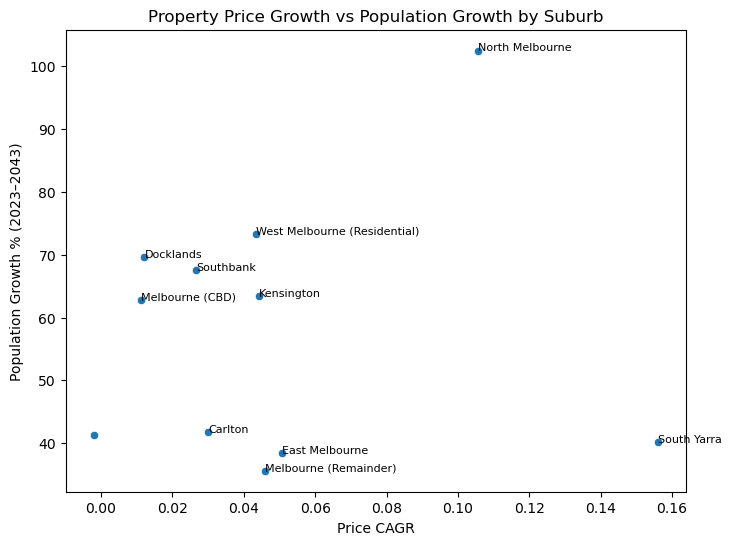

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=investment_df, x='price_cagr', y='pop_growth_pct')
for area in top10.index:
    plt.text(investment_df.loc[area,'price_cagr'], investment_df.loc[area,'pop_growth_pct'], area, fontsize=8)
plt.xlabel('Price CAGR')
plt.ylabel('Population Growth % (2023–2043)')
plt.title('Property Price Growth vs Population Growth by Suburb')
plt.show()

## Insights from Visualisation

The scatterplot comparing property price growth (CAGR) and population growth percentages revealed the following insights:

1. **Correlation Between Price and Population Growth**:
   - Suburbs with higher population growth percentages tend to exhibit stronger property price growth.
   - This correlation underscores the impact of demographic trends on property markets.

2. **Top Performing Suburbs**:
   - Suburbs such as North Melbourne and Docklands stand out as high performers, excelling in both price CAGR and population growth.
   - These areas are prime candidates for investment due to their balanced growth metrics.

3. **Strategic Investment Opportunities**:
   - Suburbs with moderate population growth but high price CAGR, or vice versa, offer unique investment opportunities depending on the investor's risk appetite and strategy.

This visualisation provides a clear overview of how demographic and economic factors interact, guiding stakeholders in identifying high-potential investment areas.